<a href="https://colab.research.google.com/github/kevin3302/PDS-Assgn-3-SP25/blob/main/PDS_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/kevin3302/PDS-Assgn-3-SP25/refs/heads/main/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **a) Set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison. (5 points)**

In [3]:
# setting seed
np.random.seed(42)

diabetes_25 = diabetes.sample(n = 25, random_state=42) # setting seed (state) again with pandas
diabetes_25.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [4]:
# mean and highest glucose values of sample and population

sample_mean = diabetes_25['Glucose'].mean()
sample_max = diabetes_25['Glucose'].max()

pop_mean = diabetes['Glucose'].mean()
pop_max = diabetes['Glucose'].max()

print('Sample Mean: ', sample_mean)
print('Sample Max: ', sample_max)
print('Population Mean: ', pop_mean)
print('Population Max: ', pop_max)

Sample Mean:  116.64
Sample Max:  183
Population Mean:  120.89453125
Population Max:  199


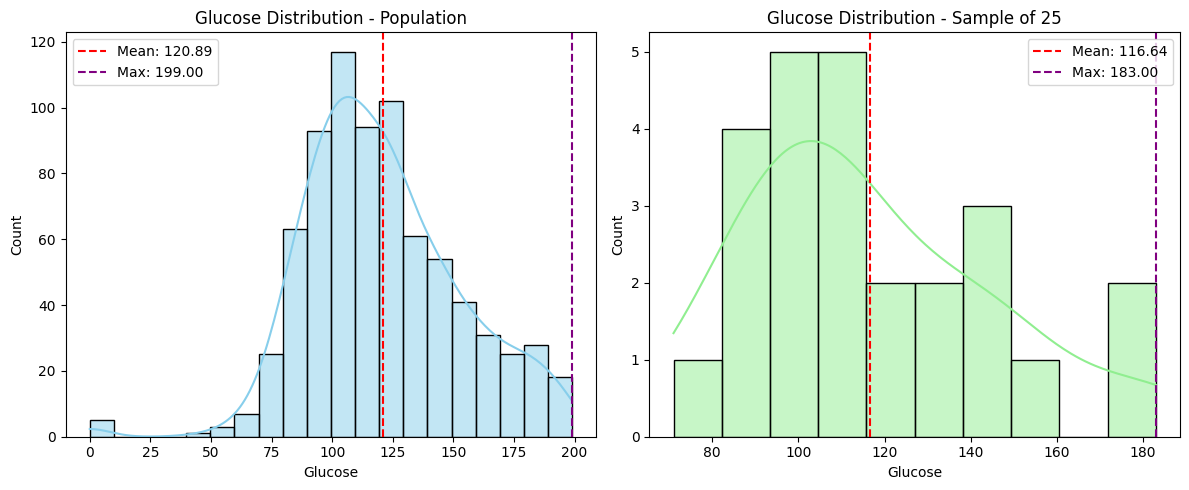

In [5]:
plt.figure(figsize=(12, 5))

# Subplot 1: Population
plt.subplot(1, 2, 1)
sns.histplot(diabetes['Glucose'], bins=20, kde=True, color='skyblue')
plt.axvline(pop_mean, color='red', linestyle='--', label=f'Mean: {pop_mean:.2f}')
plt.axvline(pop_max, color='purple', linestyle='--', label=f'Max: {pop_max:.2f}')
plt.title('Glucose Distribution - Population')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend()

# Subplot 2: Sample of 25
plt.subplot(1, 2, 2)
sns.histplot(diabetes_25['Glucose'], bins=10, kde=True, color='lightgreen')
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Mean: {sample_mean:.2f}')
plt.axvline(sample_max, color='purple', linestyle='--', label=f'Max: {sample_max:.2f}')
plt.title('Glucose Distribution - Sample of 25')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

***The population distribution shows approximately normal distribution with a mean of 120.89 and a maximum of 199.00. The sample distribution is more irregular, with a mean of 116.64 and a maximum of 183.00. Comparatively Mean and Highest value of Population is higher than that of Sample.***

### **b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.**

In [6]:
population_98th = np.percentile(diabetes['BMI'], 98)
sample_98th = np.percentile(diabetes_25['BMI'], 98)

print('Population 98th Percentile: ', population_98th)
print('Sample 98th Percentile: ', sample_98th)

Population 98th Percentile:  47.52599999999996
Sample 98th Percentile:  40.248


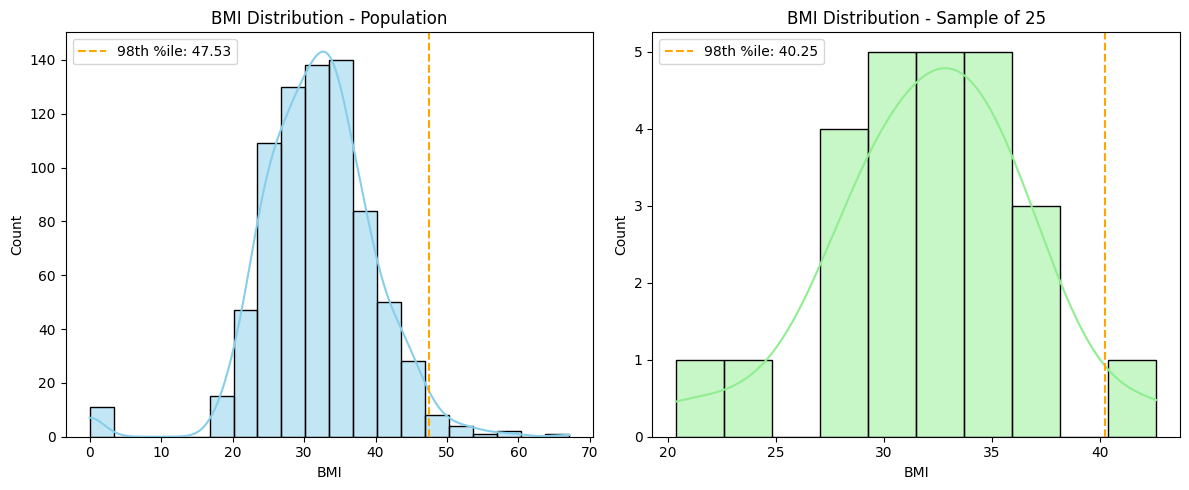

In [7]:
# Plot comparison
plt.figure(figsize=(12, 5))

# Population plot
plt.subplot(1, 2, 1)
sns.histplot(diabetes['BMI'], bins=20, kde=True, color='skyblue')
plt.axvline(population_98th, color='orange', linestyle='--', label=f'98th %ile: {population_98th:.2f}')
plt.title('BMI Distribution - Population')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()

# Sample plot
plt.subplot(1, 2, 2)
sns.histplot(diabetes_25['BMI'], bins=10, kde=True, color='lightgreen')
plt.axvline(sample_98th, color='orange', linestyle='--', label=f'98th %ile: {sample_98th:.2f}')
plt.title('BMI Distribution - Sample of 25')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

***The population's 98th percentile BMI is 47.53 and the sample's 98th percentile of 40.25 indicates that the sample did not captured the highest BMIs present in the population***

### **c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings. (10 points)**

In [8]:
n_iterations = 500
sample_size = 150
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

# Bootstrap sampling
for _ in range(n_iterations):
    sample = diabetes['BloodPressure'].sample(n=sample_size, replace=True)
    bootstrap_means.append(sample.mean())
    bootstrap_stds.append(sample.std())
    bootstrap_percentiles.append(np.percentile(sample, 98))

In [9]:
population_mean = diabetes['BloodPressure'].mean()
population_std = diabetes['BloodPressure'].std()
population_percentile = np.percentile(diabetes['BloodPressure'], 98)

bootstrap_df = pd.DataFrame({
    'Mean': bootstrap_means,
    'Standard Deviation': bootstrap_stds,
    '98th Percentile': bootstrap_percentiles
})

bootstrap_df.head()

,Mean,Standard Deviation,98th Percentile
0,71.160000,16.061158,100.00
1,70.980000,15.486938,104.04
2,71.133333,15.138584,106.00
3,69.566667,18.782906,96.08
4,65.986667,22.750466,95.18


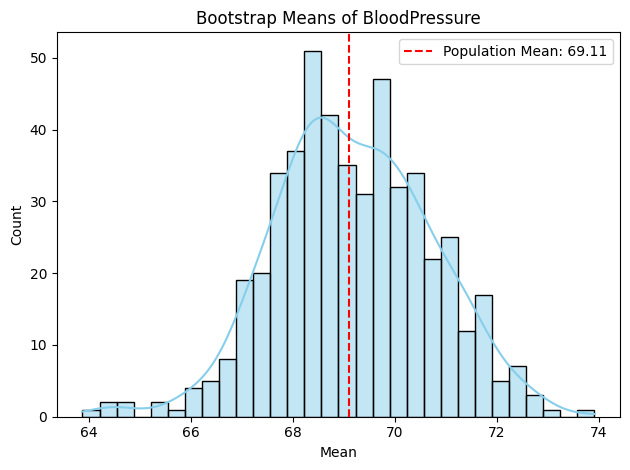

In [10]:
# Mean
sns.histplot(bootstrap_df['Mean'], bins=30, color='skyblue', kde=True)
plt.axvline(population_mean, color='red', linestyle='--', label=f'Population Mean: {population_mean:.2f}')
plt.title('Bootstrap Means of BloodPressure')
plt.legend()

plt.tight_layout()
plt.show()

***The dashed red line shows the true population mean of BloodPressure is at 69.11, which falls within the center of the distribution of sample means. The distribution of bootstrap sample means for BloodPressure appears approximately normal and ranges from approximately 64 to 74.***

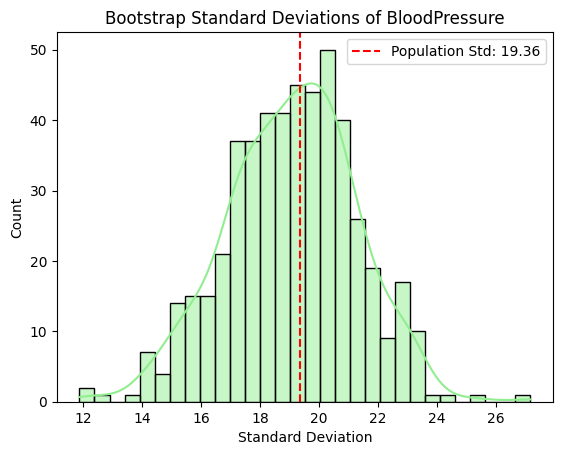

In [11]:
# Standard Deviation
sns.histplot(bootstrap_df['Standard Deviation'], bins=30, color='lightgreen', kde=True)
plt.axvline(population_std, color='red', linestyle='--', label=f'Population Std: {population_std:.2f}')
plt.title('Bootstrap Standard Deviations of BloodPressure')
plt.legend()

plt.show()

***Bootstrap sample standard deviations for BloodPressure ranges from 12 to 27 center around the population standard deviation is 19.36, suggesting the resampling accurately captures the true variability.***

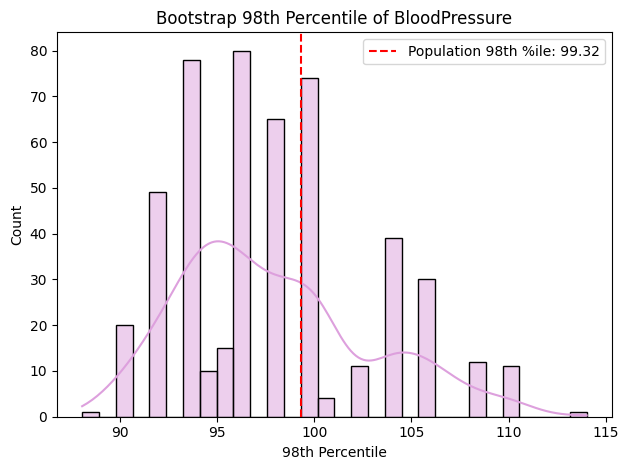

In [12]:
# 98th Percentile
sns.histplot(bootstrap_df['98th Percentile'], bins=30, color='plum', kde=True)
plt.axvline(population_percentile, color='red', linestyle='--', label=f'Population 98th %ile: {population_percentile:.2f}')
plt.title('Bootstrap 98th Percentile of BloodPressure')
plt.legend()

plt.tight_layout()
plt.show()

***The range of the bootstrapped sample 98th percentiles for BloodPressure, falls approximately between 90 to 115 whereas 98th percentile of population is 99.32. This suggests that the resampling method provides estimates that, on average, reflect the true 98th percentile of the population with some fluctuations.***